<a href="https://colab.research.google.com/github/05kartikgarg/ML_Lab_CS181104/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network

### Importing libraries

In [40]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [41]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


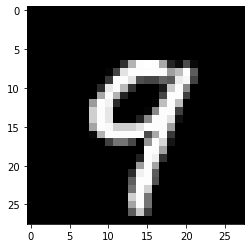

In [42]:
print("Label:",y_test[12:13])
plt.imshow(x_test[12:13].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [43]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


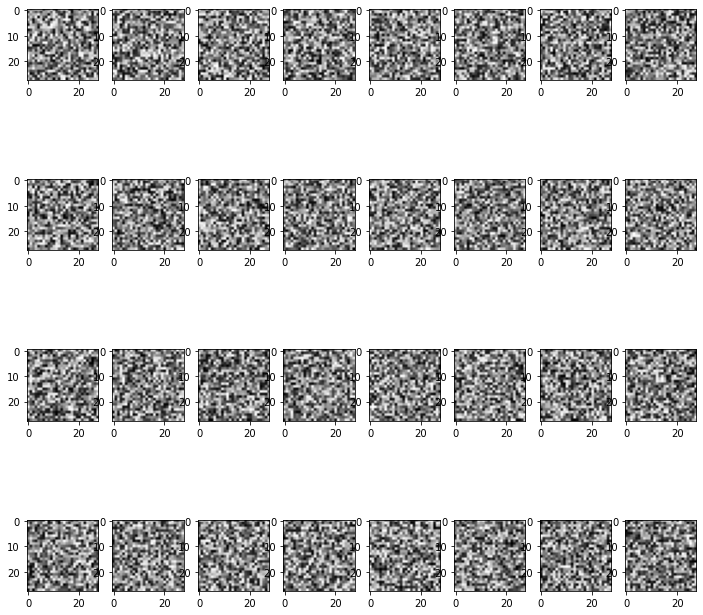

In [44]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [46]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.9882 - accuracy: 0.3777
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7683 - accuracy: 0.8075
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 0.8965
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.9193
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9317


### Testing

In [47]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21593105792999268
Test accuracy: 0.9394000172615051


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


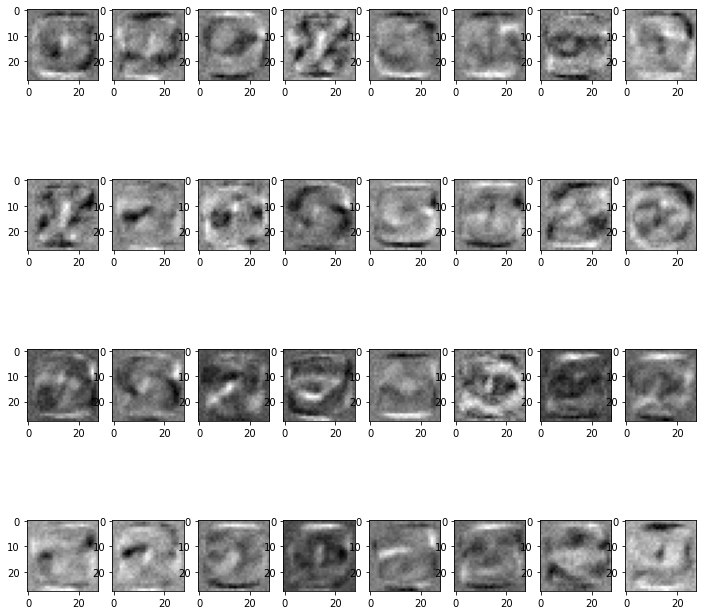

In [48]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [49]:
# Write the index of the test sample to test
prediction = model.predict(x_test[88:89])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [2.1567314e-03 1.1644540e-03 4.7956784e-03 1.0501505e-05 3.1018690e-03
 1.6739345e-03 9.8685515e-01 6.9484526e-07 2.3729703e-04 3.7265652e-06]

Thresholded output
 [0 0 0 0 0 0 1 0 0 0]


### Ground truth

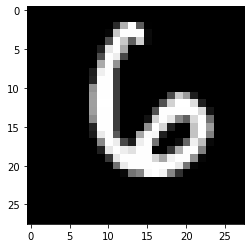

In [50]:
# Write the index of the test sample to show
plt.imshow(x_test[88:89].reshape(28,28),cmap='gray')
plt.show()

### User Input

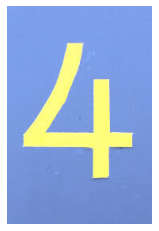

In [51]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

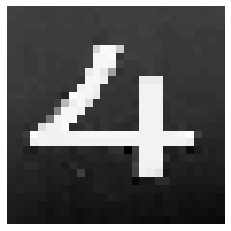

In [52]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [53]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [7.0161070e-03 6.3193338e-03 1.9289310e-01 2.0528273e-01 2.9605368e-04
 6.4780615e-02 3.8428686e-03 3.4890373e-03 5.1335931e-01 2.7209171e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 0 1 0]

Predicted Digit:
 8


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [54]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [55]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [56]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.2082 - accuracy: 0.9408
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.1764 - accuracy: 0.9509
Test loss: 0.18006445467472076
Test accuracy: 0.9491000175476074


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [57]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.1629 - accuracy: 0.2693 - val_loss: 1.7077 - val_accuracy: 0.4967
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5948 - accuracy: 0.5497 - val_loss: 1.3174 - val_accuracy: 0.5526
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 1.2505 - accuracy: 0.591

### Relu Activation Function

In [58]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.1019 - accuracy: 0.3898 - val_loss: 1.3976 - val_accuracy: 0.7051
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.2111 - accuracy: 0.7547 - val_loss: 0.7635 - val_accuracy: 0.8340
Test loss: 0.7634844183921814
Test accuracy: 0.8339999914169312
Shape of First Layer (784, 8)
Visual

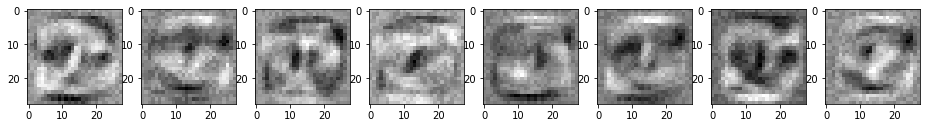

In [59]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [60]:
# Write your code here 

# Use the same layer design from the above cell 

### Lower number of Layers. For example 1 hidden layer

In [61]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_50 (Dense)             (None, 8)                

### Lower number of Layers. For example 4 hidden layers

In [62]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science